In [1]:
import pickle
import pandas as pd
import numpy as np
import detectda as dtda
import matplotlib.pyplot as plt
from skimage import filters
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sys
from joblib import Parallel, delayed
from scipy.stats import mode

In [3]:
import BayesCC, bclr

In [4]:
vids2 = np.load("Experiment2_Plus1_Images1000.npy")
vid201 = vids2[201]
vid902 = vids2[902]

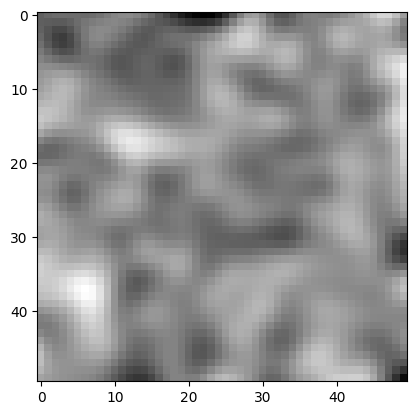

In [5]:
plt.imshow(filters.gaussian(vids2[27][45], sigma=2), cmap='gray')

In [10]:
file=open('experiment2_data.pickle', 'rb')
exp2=pickle.load(file)

In [6]:
file1 = open('experiment2_prior2.pickle', 'rb')
exp2_p = pickle.load(file1)

In [7]:
np.mean(np.array([mod.post_k_mode for mod in exp2_p['bcc_tda']])==40)

0.508

In [8]:
plt.rcParams["font.family"] = "Nunito"

In [12]:
kcp_tda_all = exp2['kcp_tda']
kcp_pca_all = exp2['kcp_pca']

cf_tda_all = exp2['cf_tda']
cf_pca_all = exp2['cf_pca']

bclr_tda_all = exp2['bcc_tda']
bclr_pca_all = exp2['bcc_pca']

In [30]:
def rmse(x):
    return np.sqrt(np.mean(x**2))

cp_bclr_mses_tda = [rmse(bclr.post_k-40)  for bclr in bclr_tda_all]
cp_bclr_mses_pca = [rmse(bclr.post_k-40)  for bclr in bclr_pca_all]

In [31]:
print("Mean RMSE: %0.3f" % np.mean(cp_bclr_mses_tda))
print("SE RMSE: %0.3f" % np.std(cp_bclr_mses_tda))

Mean RMSE: 4.498
SE RMSE: 4.649


In [33]:
print("Mean RMSE: %0.3f" % np.mean(cp_bclr_mses_pca))
print("SE RMSE: %0.3f" % np.std(cp_bclr_mses_pca))

Mean RMSE: 15.151
SE RMSE: 3.893


In [ ]:
plt.hist(bclr_tda_all[4].k_draws_[2500:], bins=np.arange(1, 51))

In [ ]:
print(kcp_tda_all[27])
print(cf_tda_all[27])

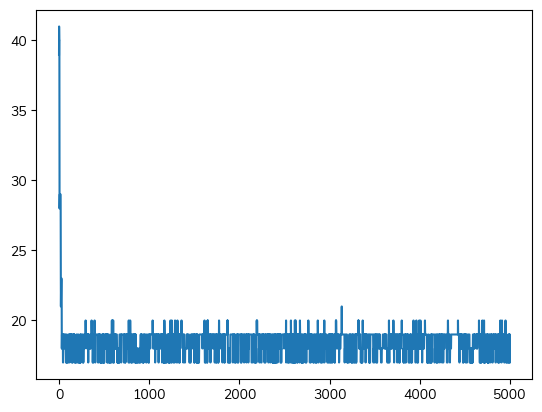

In [20]:
plt.plot(bclr_tda_all[27].k_draws_)

In [21]:
hh = pd.DataFrame(bclr_tda_all[0].k_draws_[2500:]).value_counts(normalize=True)

ind = np.where(hh.cumsum() > 1-0.05)[0][0]

In [22]:
def hpm(arr, alpha=0.05):
    probs = pd.DataFrame(arr).value_counts(normalize=True)
    ind = np.where(probs.cumsum() > 1-alpha)[0][0]
    high_mass = np.array([i[0] for i in probs.index[:(ind+1)]])
    return high_mass

In [23]:
bool(np.isin(40, hpm(bclr_tda_all[0].k_draws_[2500:], 0.05)))

False

In [24]:
hpm(bclr_tda_all[0].k_draws_[2500:], 0.05)

array([34., 36., 35.])

In [25]:
hpm(bclr_tda_all[4].k_draws_[2500:])
arr = bclr_tda_all[4].k_draws_[2500:]
probs = pd.DataFrame(arr).value_counts(normalize=True)
probs.cumsum()

40.0    0.5424
39.0    0.9480
38.0    0.9776
37.0    0.9912
36.0    0.9996
41.0    1.0000
dtype: float64

In [26]:
for al in [0.5, 0.2, 0.1, 0.05, 0.01]:    
    m1_bclr_tda = [(np.quantile(bclr.k_draws_[2500:], al/2), np.quantile(bclr.k_draws_[2500:], 1-al/2)) for bclr in bclr_tda_all] 
    m2_bclr_tda = [bool(np.isin(40, hpm(bclr.k_draws_[2500:], al))) for bclr in bclr_tda_all]
                  
    print(1-al, np.mean([x[1] >= 40 and x[0] <= 40 for x in m1_bclr_tda]), "tda quantile")
    print(1-al, np.mean(m2_bclr_tda), "tda hpm")              

0.5 0.429 tda quantile
0.5 0.4 tda hpm
0.8 0.55 tda quantile
0.8 0.535 tda hpm
0.9 0.632 tda quantile
0.9 0.609 tda hpm
0.95 0.683 tda quantile
0.95 0.667 tda hpm
0.99 0.756 tda quantile
0.99 0.746 tda hpm


In [27]:
m2_bclr_tda

[False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 T

What about Highest Posterior Density credible set? 

### bclr changepoint detection

In [28]:
rands= np.random.choice(np.arange(0, 1000), 9, replace=False)

In [29]:
k_draws_after_burn = [bclr_tda_all[i].k_draws_[2500:] for i in range(1000)]

In [30]:
kdab = np.array(k_draws_after_burn).flatten()

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        2.00000e+00, 1.32000e+02, 2.46000e+02, 5.73000e+02, 1.21400e+03,
        4.08400e+03, 8.01500e+03, 5.21700e+03, 9.81600e+03, 1.35260e+04,
        1.39900e+04, 2.10860e+04, 2.01620e+04, 2.93240e+04, 2.87800e+04,
        2.97410e+04, 3.50500e+04, 4.15820e+04, 3.76400e+04, 5.27670e+04,
        5.28430e+04, 6.91620e+04, 8.81270e+04, 1.05774e+05, 1.21813e+05,
        1.34889e+05, 1.81526e+05, 2.20025e+05, 3.60349e+05, 7.16328e+05,
        7.96150e+04, 1.60310e+04, 3.44000e+02, 2.19000e+02, 7.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]

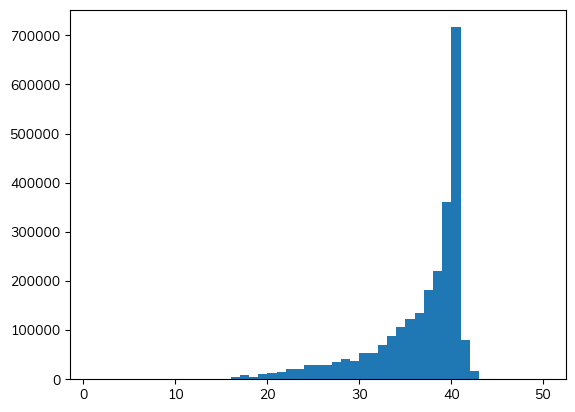

In [31]:
plt.hist(kdab, bins=np.arange(1, 51, 1))

In [32]:
cp_bclr_tda_mean = [np.mean(bclr.k_draws_[2500:], keepdims=False) for bclr in bclr_tda_all]

In [17]:
cp_bclr_tda = [mode(bclr.k_draws_[2500:], keepdims=False).mode for bclr in bclr_tda_all]
cp_bclr_pca = [mode(bclr.k_draws_[2500:], keepdims=False).mode for bclr in bclr_pca_all]

In [34]:
cp_coverage = [(np.quantile(bclr.k_draws_[2500:], 0.05), np.quantile(bclr.k_draws_[2500:], 1)) for bclr in bclr_tda_all]

In [35]:
np.mean([i[0] <= 40 and i[1] >= 40 for i in cp_coverage])

0.814

In [36]:
hj = [np.mean(np.array([mode(bclr.k_draws_[2500:], keepdims=False).mode for bclr in bclr_tda_all if bclr.k_draws_[0] == j])==40) for j in range(1,51)]

<BarContainer object of 50 artists>

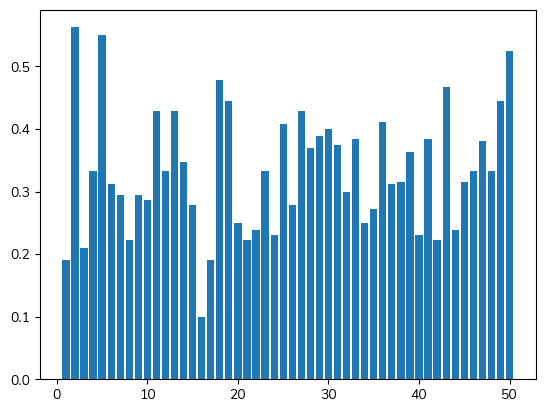

In [37]:
plt.bar(x=np.arange(1, 51), height=hj)

In [38]:
np.mean(np.array(cp_bclr_pca))

25.1

In [39]:
plt.rcParams["font.family"] = "Nunito"

In [40]:
import seaborn as sns

In [41]:
sns.set_style("whitegrid")

In [18]:
print("RMSE for bclr, TDA features: %0.3f" % np.sqrt(np.mean((np.array(cp_bclr_tda)-40)**2)))
print("RMSE for bclr, PCA features: %0.3f" % np.sqrt(np.mean((np.array(cp_bclr_pca)-40)**2)))

print("\n")

print("Probability k=40 for bclr, TDA features: %0.3f" % np.mean(np.array(cp_bclr_tda)==40))
print("Probability k=40 for bclr, PCA features: %0.3f" % np.mean(np.array(cp_bclr_pca)==40))

print("Std Err: Probability k=40 for bclr, TDA features: %0.3f" % (np.std(np.array(cp_bclr_tda)==40)/np.sqrt(1000)))
print("Std Err: Probability k=40 for bclr, PCA features: %0.3f" % (np.std(np.array(cp_bclr_pca)==40)/np.sqrt(1000)))

RMSE for bclr, TDA features: 6.465
RMSE for bclr, PCA features: 15.521


Probability k=40 for bclr, TDA features: 0.334
Probability k=40 for bclr, PCA features: 0.000
Std Err: Probability k=40 for bclr, TDA features: 0.015
Std Err: Probability k=40 for bclr, PCA features: 0.000


In [71]:
np.std(np.array(cp_bclr_tda)==40)/np.sqrt(1000)

0.014914556647785415

In [49]:
print("Probability k=40 for bclr, TDA features (first 50): %0.3f" % np.mean(np.array(cp_bclr_tda[:50])==40))

Probability k=40 for bclr, TDA features (first 50): 0.380


In [50]:
for i in range(5, 0, -1):
    print("Probability "+str(40-i)+" <= k <= "+str(40+i)+" for bclr, TDA features: %0.3f" % np.mean(
        np.logical_and(np.array(cp_bclr_tda) <= 40+i, np.array(cp_bclr_tda) >= 40-i)))

Probability 35 <= k <= 45 for bclr, TDA features: 0.733
Probability 36 <= k <= 44 for bclr, TDA features: 0.685
Probability 37 <= k <= 43 for bclr, TDA features: 0.642
Probability 38 <= k <= 42 for bclr, TDA features: 0.571
Probability 39 <= k <= 41 for bclr, TDA features: 0.499


In [51]:
np.mean((np.array(cp_bclr_tda_mean)-40)**2)

37.70564568448

Let's look at the beta coefficients

In [52]:
cp_bclr_tda_beta = np.array([bclr.beta_draws_[2500:] for bclr in bclr_tda_all])
names = ['mean_0_mid', 'variance_0_mid', 'skewness_0_mid', 'kurtosis_0_mid', 'median_0_mid', 'iqr_0_mid', 'q25_0_mid', 'q75_0_mid', 'pers_entr_0_life', 'alps_0_life', 'mean_0_life', 'variance_0_life','skewness_0_life', 'kurtosis_0_life', 'median_0_life', 'iqr_0_life', 'q25_0_life', 'q75_0_life', 'mean_1_mid', 'variance_1_mid', 'skewness_1_mid', 'kurtosis_1_mid', 'median_1_mid', 'iqr_1_mid','q25_1_mid', 'q75_1_mid', 'pers_entr_1_life', 'alps_1_life','mean_1_life', 'variance_1_life', 'skewness_1_life', 'kurtosis_1_life','median_1_life', 'iqr_1_life', 'q25_1_life', 'q75_1_life']
beta_cors = np.array([np.corrcoef(bcbeta, rowvar=False) for bcbeta in cp_bclr_tda_beta])
bcors = np.mean(beta_cors, axis=0)

In [53]:
nam1 = []
nam2 = []
cors = []
for i in range(35):
    for j in range(i+1, 36):
        nam1.append(names[i])
        nam2.append(names[j])
        cors.append(bcors[i,j])

In [54]:
cor_df = pd.DataFrame({'Var1': nam1, 'Var2': nam2, 'Corr': cors})
cor_df.reindex(cor_df['Corr'].abs().sort_values(ascending=False).index)[:20]

,Var1,Var2,Corr
421,iqr_0_life,q75_0_life,-0.575143
354,skewness_0_life,kurtosis_0_life,-0.553097
628,iqr_1_life,q75_1_life,-0.536209
166,iqr_0_mid,q75_0_mid,-0.490053
552,iqr_1_mid,q25_1_mid,0.463914
553,iqr_1_mid,q75_1_mid,-0.434505
165,iqr_0_mid,q25_0_mid,0.426100
615,skewness_1_life,kurtosis_1_life,-0.422728
254,pers_entr_0_life,variance_0_life,0.378660
480,mean_1_mid,median_1_mid,-0.354436


In [55]:
beta_snr = np.array([np.mean(bcbeta, axis=0)**2/np.var(bcbeta, axis=0) for bcbeta in cp_bclr_tda_beta])

In [56]:
abc = pd.Series(np.array(names)[np.argmax(beta_snr, axis=1)]).value_counts(normalize=True)
prop_largest = abc.reindex(names).fillna(0)
df_prop = pd.DataFrame({'names': names, 'mean_snr': np.mean(beta_snr, axis=0), 'sd_snr': np.std(beta_snr, axis=0),
              'prop_highest': prop_largest}).sort_values("prop_highest", ascending=False)

In [57]:
df_prop

,names,mean_snr,sd_snr,prop_highest
variance_1_life,variance_1_life,3.188553,1.778926,0.295
kurtosis_1_mid,kurtosis_1_mid,2.141882,2.195032,0.152
kurtosis_1_life,kurtosis_1_life,2.240817,1.579042,0.139
skewness_1_mid,skewness_1_mid,1.856433,1.973434,0.114
variance_1_mid,variance_1_mid,1.367577,1.616695,0.067
q25_1_life,q25_1_life,0.835270,1.248228,0.033
variance_0_mid,variance_0_mid,0.793182,1.171823,0.027
skewness_0_mid,skewness_0_mid,0.760200,1.143386,0.021
kurtosis_0_mid,kurtosis_0_mid,0.793376,1.094070,0.020
q25_0_life,q25_0_life,0.706545,1.047673,0.018


In [58]:
nam_5 = list(df_prop.head(5).index)
nam_list = np.array(names)

In [59]:
cor_index = [np.where(nam_list == nam)[0][0] for nam in nam_5]

In [60]:
for i in cor_index:
    for j in cor_index:
        if i<j:
            print(nam_list[i], "\t\t", nam_list[j], "\t\t", np.round(bcors[i,j],3))

variance_1_life 		 kurtosis_1_life 		 -0.128
kurtosis_1_mid 		 variance_1_life 		 -0.022
kurtosis_1_mid 		 kurtosis_1_life 		 -0.012
skewness_1_mid 		 variance_1_life 		 -0.02
skewness_1_mid 		 kurtosis_1_mid 		 -0.053
skewness_1_mid 		 kurtosis_1_life 		 -0.014
variance_1_mid 		 variance_1_life 		 -0.022
variance_1_mid 		 kurtosis_1_mid 		 -0.187
variance_1_mid 		 kurtosis_1_life 		 -0.006
variance_1_mid 		 skewness_1_mid 		 -0.026


### Changeforest changepoint detection

In [62]:
cp_cf_tda = [a['best_split'] for a in cf_tda_all]
cp_cf_pca = [a['best_split'] for a in cf_pca_all]

print("RMSE for CF, TDA features: %0.3f" % np.sqrt(np.mean((np.array(cp_cf_tda)-40)**2)))
print("RMSE for CF, PCA features: %0.3f" % np.sqrt(np.mean((np.array(cp_cf_pca)-40)**2)))

RMSE for CF, TDA features: 5.030
RMSE for CF, PCA features: 21.191


In [73]:
print("Probability k=40 for CF, TDA features: %0.3f" % np.mean(np.array(cp_cf_tda)==40))
print("Probability k=40 for CF, PCA features: %0.3f" % np.mean(np.array(cp_cf_pca)==40))

print("Std Err: Probability k=40 for CF, TDA features: %0.3f" % (np.std(np.array(cp_cf_tda)==40)/np.sqrt(1000)))
print("Std Err: Probability k=40 for CF, PCA features: %0.3f" % (np.std(np.array(cp_cf_pca)==40)/np.sqrt(1000)))

Probability k=40 for CF, TDA features: 0.458
Probability k=40 for CF, PCA features: 0.020
Std Err: Probability k=40 for CF, TDA features: 0.016
Std Err: Probability k=40 for CF, PCA features: 0.004


In [51]:
np.min(np.array(cp_cf_tda))

1

(array([  2.,   0.,   2.,   1.,   4.,   4.,   1.,   3.,   4.,   6.,  10.,
         11.,   5.,  12.,  52., 102., 591., 145.,  29.,  16.]),
 array([ 1.  ,  3.35,  5.7 ,  8.05, 10.4 , 12.75, 15.1 , 17.45, 19.8 ,
        22.15, 24.5 , 26.85, 29.2 , 31.55, 33.9 , 36.25, 38.6 , 40.95,
        43.3 , 45.65, 48.  ]),
 <BarContainer object of 20 artists>)

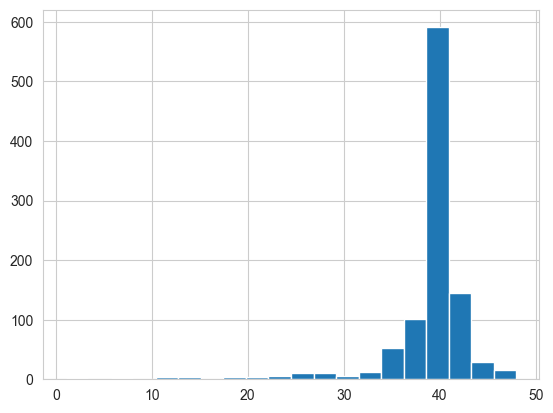

In [52]:
plt.hist(np.array(cp_cf_tda), bins=20)

Kernel Changepoint detection using <code>ruptures</code> package

In [75]:
cp_kcp_tda = [a['changepoint'][0] for a in kcp_tda_all]
cp_kcp_pca = [a['changepoint'][0] for a in kcp_pca_all]

Changepoint distribution for Kernel Changepoint detection and dynamic programming using TDA features

In [76]:
cp_kcp_tda

[40,
 40,
 42,
 41,
 40,
 40,
 40,
 41,
 35,
 41,
 40,
 40,
 38,
 43,
 40,
 43,
 39,
 42,
 42,
 43,
 39,
 40,
 40,
 33,
 37,
 40,
 42,
 48,
 40,
 40,
 40,
 42,
 41,
 40,
 42,
 41,
 42,
 39,
 40,
 40,
 40,
 44,
 41,
 42,
 45,
 41,
 40,
 40,
 40,
 40,
 41,
 40,
 39,
 39,
 39,
 40,
 40,
 38,
 40,
 37,
 40,
 45,
 40,
 40,
 42,
 41,
 41,
 40,
 40,
 40,
 40,
 42,
 39,
 40,
 40,
 41,
 40,
 45,
 40,
 40,
 38,
 40,
 40,
 46,
 44,
 41,
 41,
 39,
 40,
 43,
 40,
 40,
 40,
 41,
 40,
 38,
 41,
 40,
 39,
 40,
 45,
 41,
 40,
 40,
 39,
 39,
 42,
 40,
 40,
 41,
 39,
 40,
 42,
 42,
 40,
 40,
 40,
 40,
 40,
 39,
 40,
 42,
 40,
 41,
 43,
 40,
 41,
 40,
 40,
 40,
 25,
 38,
 38,
 40,
 40,
 40,
 40,
 39,
 40,
 40,
 41,
 41,
 40,
 39,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 41,
 38,
 42,
 40,
 44,
 40,
 47,
 41,
 40,
 40,
 40,
 40,
 41,
 40,
 41,
 40,
 40,
 41,
 44,
 41,
 40,
 41,
 42,
 41,
 26,
 39,
 41,
 44,
 46,
 41,
 40,
 39,
 41,
 42,
 40,
 40,
 45,
 40,
 40,
 40,
 39,
 40,
 40,
 40,
 42,
 41,
 39,
 42,
 40,


In [77]:
print("RMSE for KCP, TDA features: %0.3f" % np.sqrt(np.mean((np.array(cp_kcp_tda)-40)**2)))
print("RMSE for KCP, PCA features: %0.3f" % np.sqrt(np.mean((np.array(cp_kcp_pca)-40)**2)))

RMSE for KCP, TDA features: 3.300
RMSE for KCP, PCA features: 21.729


In [78]:
print("Probability k=40 for KCP, TDA features: %0.3f" % np.mean(np.array(cp_kcp_tda)==40))
print("Probability k=40 for KCP, PCA features: %0.3f" % np.mean(np.array(cp_kcp_pca)==40))

print("Std Err: Probability k=40 for KCP, TDA features: %0.3f" % (np.std(np.array(cp_kcp_tda)==40)/np.sqrt(1000)))
print("Std Err: Probability k=40 for KCP, PCA features: %0.3f" % (np.std(np.array(cp_kcp_pca)==40)/np.sqrt(1000)))

Probability k=40 for KCP, TDA features: 0.534
Probability k=40 for KCP, PCA features: 0.019
Std Err: Probability k=40 for KCP, TDA features: 0.016
Std Err: Probability k=40 for KCP, PCA features: 0.004


In [57]:
print("Worst deviation from actual KCP: "+str(int(np.max(np.abs(np.array(cp_kcp_tda)-40)))))
print("Worst deviation from actual CF: "+str(int(np.max(np.abs(np.array(cp_cf_tda)-40)))))
print("Worst deviation from actual bclr: "+str(int(np.max(np.abs(np.array(cp_bclr_tda)-40)))))

Worst deviation from actual KCP: 38
Worst deviation from actual CF: 39
Worst deviation from actual bclr: 25


(array([  3.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,   1.,   3.,
          0.,   0.,   4.,  11.,  40., 760., 112.,  48.,  14.]),
 array([ 2. ,  4.3,  6.6,  8.9, 11.2, 13.5, 15.8, 18.1, 20.4, 22.7, 25. ,
        27.3, 29.6, 31.9, 34.2, 36.5, 38.8, 41.1, 43.4, 45.7, 48. ]),
 <BarContainer object of 20 artists>)

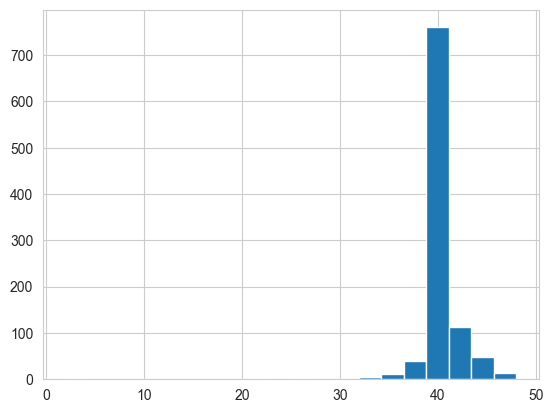

In [58]:
plt.hist(np.array(cp_kcp_tda), bins=20)

### How does it compare to the integration methods?

In [59]:
#289, 208, 318, 582, 956 are good ones...

from scipy.stats import multivariate_normal

#705, 902, 948 yield interesting behavior
ind = np.random.randint(1, 1001, 1)[0]
print(str(ind)+"\n")

#Small variance of coordinates works really well!!!
prior_cov = np.diag(np.repeat(0.25, 36))

#Could the sigma value = 2, be obstructing the behavior here? 
aa_k = bclr.BayesCC_kappa(bclr_tda_all[ind].X, prior_cov = prior_cov, n_iter = 5000, print_res=False)
print(aa_k['probs'].idxmax(), "\n\n", aa_k['probs'].max())

print("\n"+"Changepoint from beta sim method (bclr): "+str(cp_bclr_tda[ind]))

print("\n"+"Changepoint from KCP: "+str(cp_kcp_tda[ind]))

print("\n"+"Changepoint from CF: "+str(cp_cf_tda[ind]))


231

Probability    40
dtype: int64 

 Probability    0.50566
dtype: float64

Changepoint from beta sim method (bclr): 40.0

Changepoint from KCP: 40

Changepoint from CF: 40


### Below, we process the data for usage by the methods using R